In [9]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns
import spacy
import re
nlp = spacy.load('en')

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    """ Cleans Twitter specific issues
    Should probably clean out mentions, URLs, and RT's.
    """
    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!
    s = sub('@\w+','', s) 
    s = sub(' +', ' ',s)
    s = sub('#','', s) 
    s = sub("%", " percent", s) 
    s = sub('https\S+','',s) 
    s = sub('RT','',s) 
    s = sub('\n','',s) 
    s = sub('[^\w\s]','',s) 
    s = s.encode('ascii', 'ignore').decode('ascii')
    s = sub("&amp;", "and",s)
    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 
    doc = nlp(s)
    s = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    s = ' '.join([x for x in s])
    return s

In [10]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [11]:
X.head()

0    RT @LilMissRightie: Here's CNN on Sharia law. You can be stoned or have your...
1    RT @NetworksManager: LOOK obama Clinton cronies ILLEGALLY arm &amp; train mu...
2    RT @GrrrGraphics: #ThrowbackThursday #BenGarrison #cartoon from 2013 #Obama ...
3    RT @PeterTownsend7: Say 'Islam is peace', or else!  #trump #maga #isis #tcot...
4    RT @ToddDracula: @realDonaldTrump All aboard the Trump Train! #ChooChoo 🚂 ht...
Name: tweet, dtype: object

In [12]:
X.map(clean_twitter)

0                                                 Heres CNN Sharia law stone hand cut  
1          LOOK obama Clinton crony ILLEGALLY arm amp train muslim terrorist include...
2          ThrowbackThursday BenGarrison cartoon 2013 Obama get crown War Debt taxis...
3                                                    Islam peace trump maga isis tcot  
4                                                         aboard Trump Train ChooChoo  
5               FLASHBACK gtgt Judicial Watch Releases Huma Abedin Deposition testimony
6                          Following FBI presser say system rig amp weigh foxldt 7 p.m.
7                                                                Trump run Rigged Press
8          literally 98 percent Hillary supporter online astroturfe spammer 12000 co...
9                                                                               Islam  
10         PSYCHO   MOTHERHillary EVILMAGA BasketOfDeplorables NeverHillaryTrumpSWFL...
11                   unthinkable

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

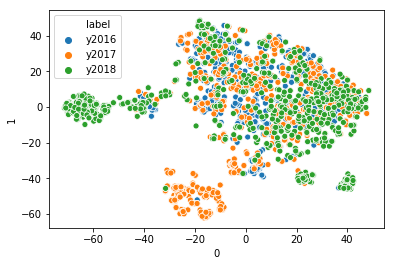

In [6]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

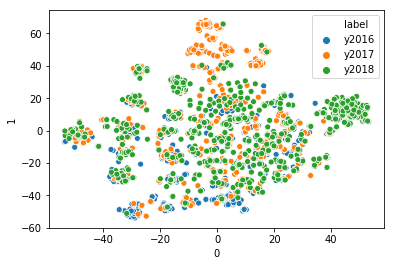

In [7]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

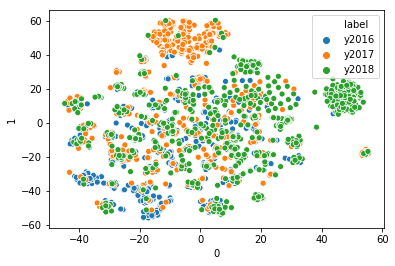

In [8]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 
vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words ="english")
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)